In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv("Data Set/CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [52]:
df["fuelsystem"].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [53]:
df["fueltype"].replace({"gas":0,"diesel":1},inplace=True)
df["aspiration"].replace({"std":0,"turbo":1},inplace=True)
df["doornumber"].replace({"two":0,"four":1},inplace=True)
df["carbody"].replace({"convertible":0,"hatchback":1,"sedan":2,"wagon":3,"hardtop":4},inplace=True)
df["drivewheel"].replace({"rwd":0,"fwd":1,"4wd":2},inplace=True)
df["enginelocation"].replace({"front":0,"rear":1},inplace=True)
df["fuelsystem"].replace({'mpfi':0, '2bbl':1, 'mfi':2, '1bbl':3, 'spfi':4, '4bbl':5, 'idi':6, 'spdi':7},inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [55]:
df.select_dtypes(include=["int64","float64"])

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,0,0,0,0,0,0,88.6,168.8,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,0,0,0,0,0,0,88.6,168.8,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,0,0,0,1,0,0,94.5,171.2,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,0,0,1,2,1,0,99.8,176.6,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,0,0,1,2,2,0,99.4,176.6,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,0,0,1,2,0,0,109.1,188.8,...,141,0,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,0,1,1,2,0,0,109.1,188.8,...,141,0,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,0,0,1,2,0,0,109.1,188.8,...,173,0,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,1,1,1,2,0,0,109.1,188.8,...,145,6,3.01,3.40,23.0,106,4800,26,27,22470.0


In [56]:
corr_matrix = df.corr()
print(corr_matrix)

                    car_ID  symboling  fueltype  aspiration  doornumber  \
car_ID            1.000000  -0.151621  0.125568    0.067729    0.190352   
symboling        -0.151621   1.000000 -0.194311   -0.059866   -0.664073   
fueltype          0.125568  -0.194311  1.000000    0.401397    0.191491   
aspiration        0.067729  -0.059866  0.401397    1.000000    0.031792   
doornumber        0.190352  -0.664073  0.191491    0.031792    1.000000   
carbody           0.168295  -0.398970  0.157580    0.021276    0.447534   
drivewheel       -0.051406   0.041671 -0.132257   -0.066465    0.098954   
enginelocation    0.051483   0.212471 -0.040070   -0.057191   -0.137757   
wheelbase         0.129729  -0.531954  0.308346    0.257611    0.447357   
carlength         0.170636  -0.357612  0.212679    0.234539    0.398568   
carwidth          0.052387  -0.232919  0.233880    0.300567    0.207168   
carheight         0.255960  -0.541038  0.284631    0.087311    0.552208   
curbweight        0.07196

C:\Users\Rudra\AppData\Local\Temp\ipykernel_4856\3083230406.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


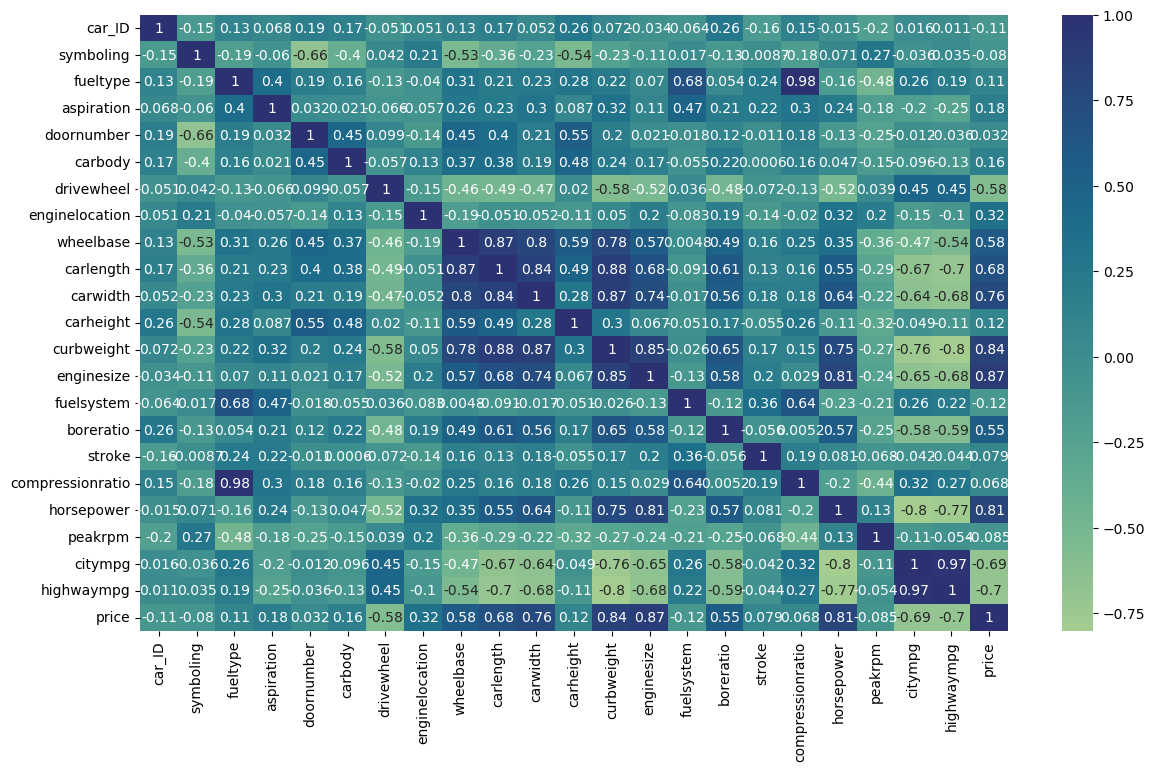

In [58]:
plt.figure(figsize=(14,8))
sns.heatmap(corr_matrix,annot=True,cmap="crest")

In [66]:
imp_cols=["fueltype","aspiration","doornumber","carbody","drivewheel","wheelbase","carlength","carwidth","curbweight","enginesize","fuelsystem","horsepower","citympg","highwaympg","price"]
imp_cols

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'fuelsystem',
 'horsepower',
 'citympg',
 'highwaympg',
 'price']

In [67]:
training_data=df[imp_cols]
training_data

,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,horsepower,citympg,highwaympg,price
0,0,0,0,0,0,88.6,168.8,64.1,2548,130,0,111,21,27,13495.0
1,0,0,0,0,0,88.6,168.8,64.1,2548,130,0,111,21,27,16500.0
2,0,0,0,1,0,94.5,171.2,65.5,2823,152,0,154,19,26,16500.0
3,0,0,1,2,1,99.8,176.6,66.2,2337,109,0,102,24,30,13950.0
4,0,0,1,2,2,99.4,176.6,66.4,2824,136,0,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,1,2,0,109.1,188.8,68.9,2952,141,0,114,23,28,16845.0
201,0,1,1,2,0,109.1,188.8,68.8,3049,141,0,160,19,25,19045.0
202,0,0,1,2,0,109.1,188.8,68.9,3012,173,0,134,18,23,21485.0
203,1,1,1,2,0,109.1,188.8,68.9,3217,145,6,106,26,27,22470.0


In [68]:
x=training_data.drop(columns=["price"])
y=training_data["price"]

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3,random_state=50)

In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 77 to 176
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fueltype    143 non-null    int64  
 1   aspiration  143 non-null    int64  
 2   doornumber  143 non-null    int64  
 3   carbody     143 non-null    int64  
 4   drivewheel  143 non-null    int64  
 5   wheelbase   143 non-null    float64
 6   carlength   143 non-null    float64
 7   carwidth    143 non-null    float64
 8   curbweight  143 non-null    int64  
 9   enginesize  143 non-null    int64  
 10  fuelsystem  143 non-null    int64  
 11  horsepower  143 non-null    int64  
 12  citympg     143 non-null    int64  
 13  highwaympg  143 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 16.8 KB


In [71]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(143, 14)
(62, 14)
(143,)
(62,)


In [72]:
LR=LinearRegression()

In [73]:
LR.fit(X_train,Y_train)

LinearRegression()

In [74]:
y_pred=LR.predict(X_test)

In [75]:
list(zip(Y_test,y_pred))

[(16695.0, 15541.55592938407),
 (11199.0, 16252.235115407195),
 (20970.0, 17983.440398460756),
 (40960.0, 38216.5520303263),
 (11259.0, 9040.759650895765),
 (6575.0, 6000.160967240357),
 (11900.0, 16116.106898527883),
 (23875.0, 18256.43224900686),
 (8845.0, 8994.8503091124),
 (5499.0, 6301.562253438824),
 (12629.0, 15926.831015571464),
 (8238.0, 8206.499003874509),
 (28176.0, 24842.79928792345),
 (9298.0, 11439.68742079891),
 (6692.0, 6801.5978269897605),
 (9549.0, 11018.243577562767),
 (15510.0, 12416.602342966085),
 (7957.0, 9134.292746777093),
 (9279.0, 11062.322081797458),
 (13845.0, 9786.37767862506),
 (7999.0, 6200.572423478094),
 (14869.0, 15908.619438868838),
 (6229.0, 6775.536737576702),
 (15998.0, 22698.381810196537),
 (5118.0, 6807.848372894987),
 (16845.0, 18576.643730302705),
 (13200.0, 19308.94719919414),
 (7129.0, 7873.320400802855),
 (8249.0, 6732.630008667242),
 (9639.0, 16281.828927548959),
 (12764.0, 17727.761254492434),
 (8358.0, 7614.761308707675),
 (5389.0, 6330.

In [79]:
mean_absolute_error(Y_test,y_pred)

2680.413609762068

In [78]:
accuracy_score(Y_test,y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets